In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start = 0
end = 1
step = 0.01

weight = 0.3
bias = 0.9

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

In [3]:
split = int(0.8*len(x))

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

In [4]:
def plot_predictions(train_data = x_train, 
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")
    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Test data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
    
    plt.legend(prop={"size": 14})

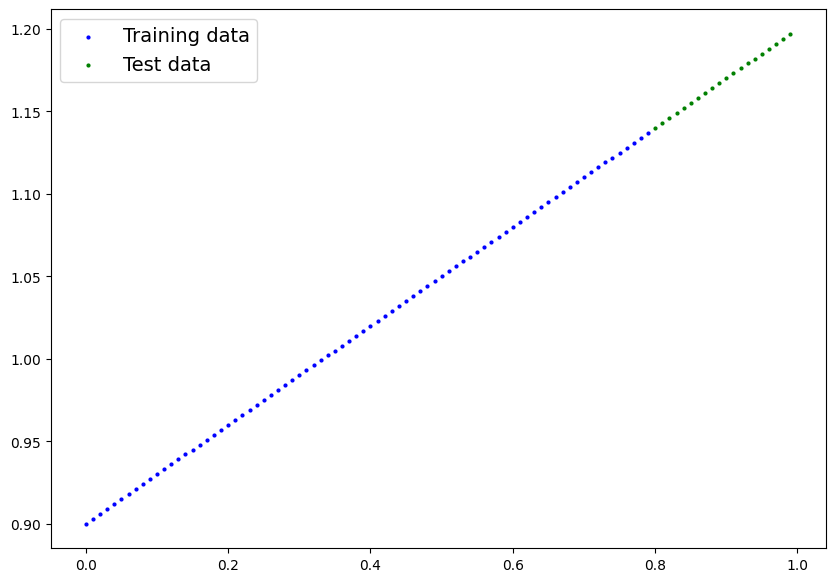

In [5]:
plot_predictions()

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))
        
    def forward(self, x):
        return self.weight * x + self.bias

In [7]:
model = LinearRegressionModel()

In [8]:
model.state_dict()

OrderedDict([('weight', tensor([0.8045])), ('bias', tensor([0.0101]))])

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.002)

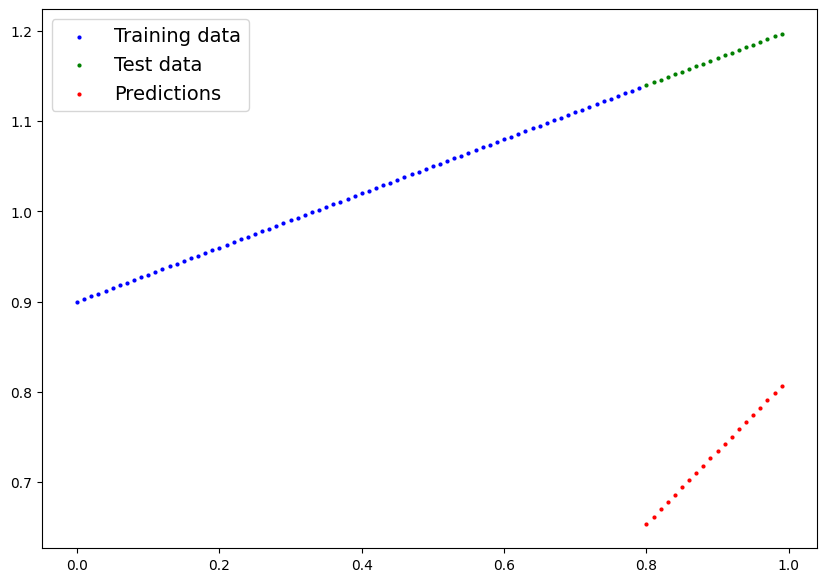

In [10]:
with torch.inference_mode():
    y_pred = model(x_test)
    
plot_predictions(predictions=y_pred)

In [11]:
epoches = 3000

info = []

for epoch in range(epoches):
    model.train()
    
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    
    with torch.inference_mode():
        test = model(x_test)
        loss_test = loss_fn(test, y_test)
    
    if epoch % 20 == 0:
        print(f"epoch: {epoch} | loss: {loss} | loss test: {loss_test}")
        info.append([epoch, loss, loss_fn])   

epoch: 0 | loss: 0.6905869245529175 | loss test: 0.43562865257263184
epoch: 20 | loss: 0.6443458795547485 | loss test: 0.3814876079559326
epoch: 40 | loss: 0.5981048345565796 | loss test: 0.32734668254852295
epoch: 60 | loss: 0.551863968372345 | loss test: 0.2732056975364685
epoch: 80 | loss: 0.5056228041648865 | loss test: 0.2190646380186081
epoch: 100 | loss: 0.45938175916671753 | loss test: 0.1649235635995865
epoch: 120 | loss: 0.4131406843662262 | loss test: 0.11078245937824249
epoch: 140 | loss: 0.36689960956573486 | loss test: 0.056828223168849945
epoch: 160 | loss: 0.32065850496292114 | loss test: 0.031584613025188446
epoch: 180 | loss: 0.2744174599647522 | loss test: 0.05296748876571655
epoch: 200 | loss: 0.23259194195270538 | loss test: 0.10247540473937988
epoch: 220 | loss: 0.2046966552734375 | loss test: 0.14273248612880707
epoch: 240 | loss: 0.18588420748710632 | loss test: 0.1745915710926056
epoch: 260 | loss: 0.17282569408416748 | loss test: 0.20007869601249695
epoch: 280

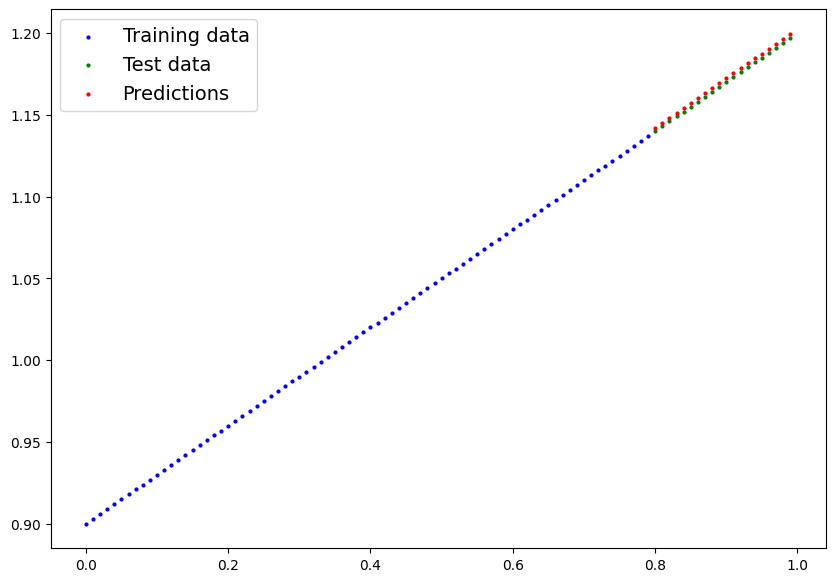

In [12]:
with torch.inference_mode():
    y_pred = model(x_test)
    
plot_predictions(predictions=y_pred)

In [13]:
model.state_dict()

OrderedDict([('weight', tensor([0.3016])), ('bias', tensor([0.9009]))])